# ATTENTION: 

Remember to pull before any change and to push often! (Problem on merging)

# Test for project1, sandbox

pour faire plaisir à William, il est demandé de mettre des titres. Faites attention car il a tendance à devenir grumpy si on ne le fait pas 

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Train Data loading

In [44]:
from proj1_helpers import *

y, x_all, ids = load_csv_data('../Data/train.csv')

In [56]:
print('Y shape : ', y.shape)
print('X shape : ', x_all.shape)

Y shape :  (250000,)
X shape :  (250000, 30)


In [46]:
x = np.delete(x_all,[4,5,6,12,26,27,28],1)

## which Definition

In [57]:
which = range(x.shape[1]) #Change according to desired features in tests

### Scatter plots

ATTENTION: missing values in 0th feature removed!
Scatter plot for 0th feature :


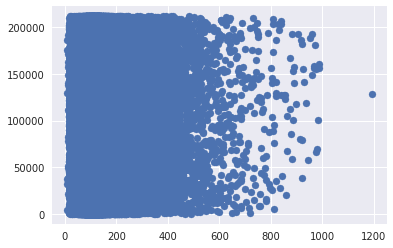

Scatter plot for 1th feature :


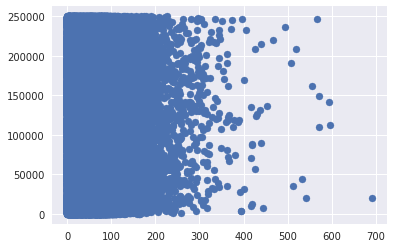

Scatter plot for 2th feature :


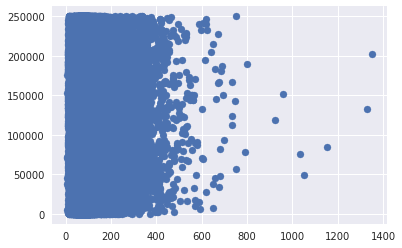

Scatter plot for 3th feature :


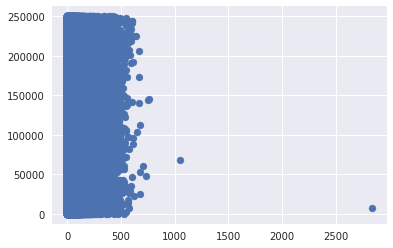

Scatter plot for 4th feature :


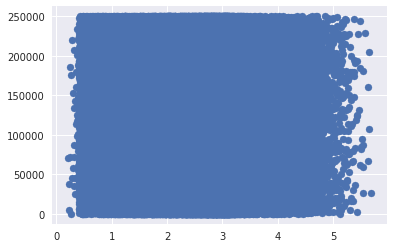

Scatter plot for 5th feature :


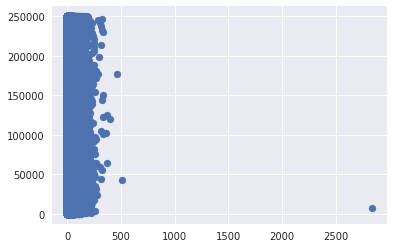

Scatter plot for 6th feature :


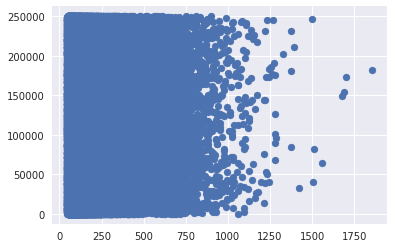

Scatter plot for 7th feature :


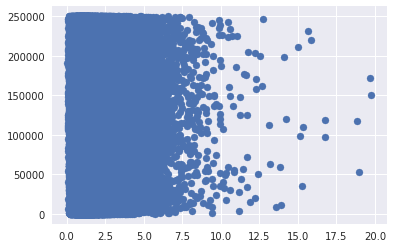

Scatter plot for 8th feature :


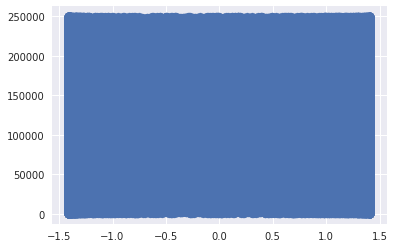

Scatter plot for 9th feature :


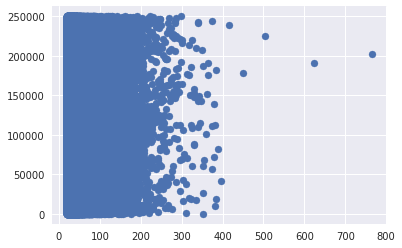

Scatter plot for 10th feature :


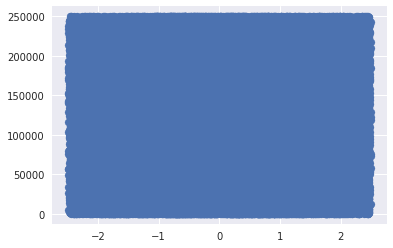

Scatter plot for 11th feature :


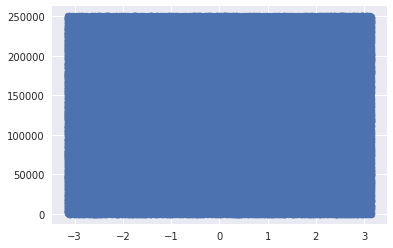

Scatter plot for 12th feature :


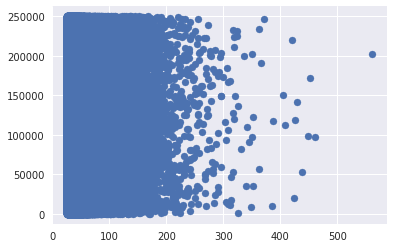

Scatter plot for 13th feature :


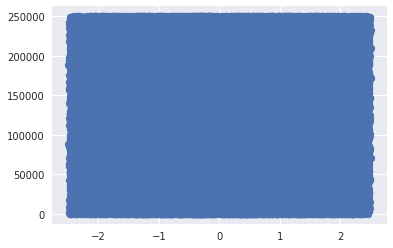

Scatter plot for 14th feature :


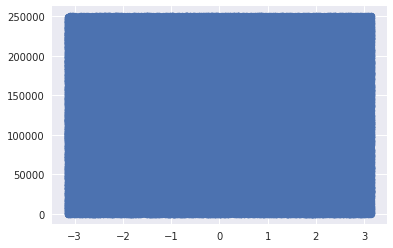

Scatter plot for 15th feature :


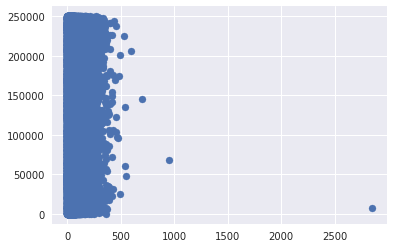

Scatter plot for 16th feature :


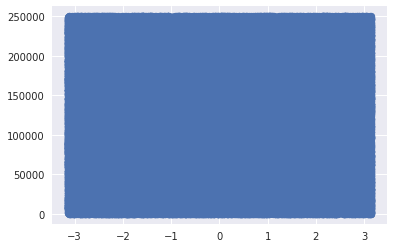

Scatter plot for 17th feature :


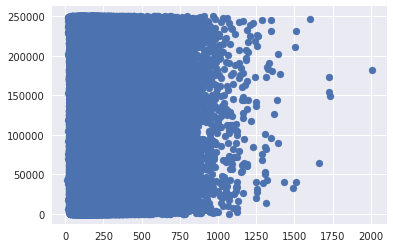

Scatter plot for 18th feature :


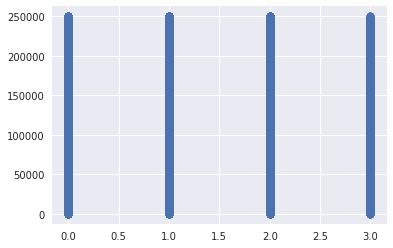

ATTENTION: missing values in 19th feature removed!
Scatter plot for 19th feature :


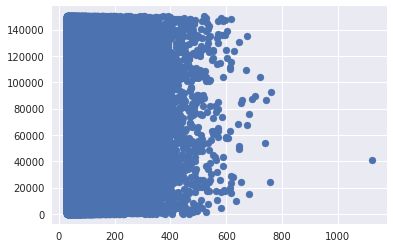

ATTENTION: missing values in 20th feature removed!
Scatter plot for 20th feature :


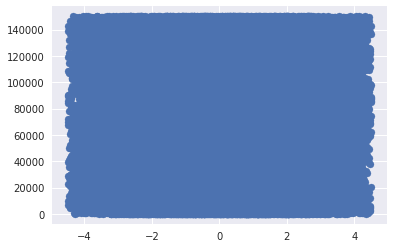

ATTENTION: missing values in 21th feature removed!
Scatter plot for 21th feature :


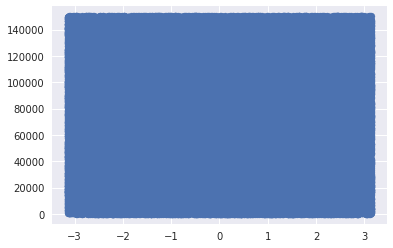

Scatter plot for 22th feature :


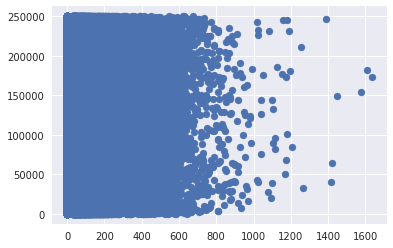

In [58]:
for i in which:
    feature = x[:,i]
    if len(feature[feature==-999]) > 0: #If there is some misplaced value we do not include them in the scatterplot
        print("ATTENTION: missing values in {i}th feature removed!".format(i=i))
    feature = feature[feature>-999]
    plt.scatter(feature, range(len(feature)))
    print("Scatter plot for {i}th feature :".format(i=i))
    plt.show()

### Histograms

In [59]:
def hist_plot(data,i):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=data, bins=50, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('{i}th feature'.format(i=i))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

/home/charles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


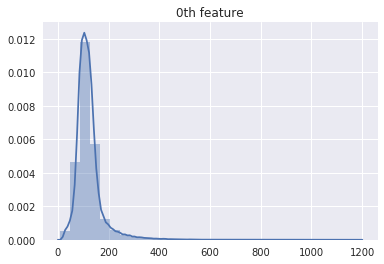

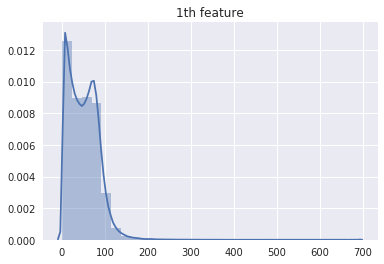

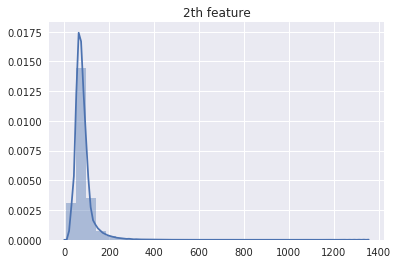

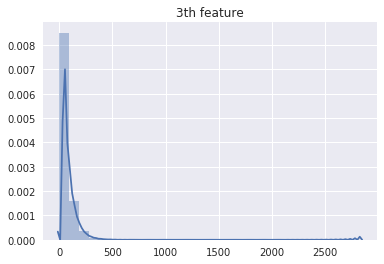

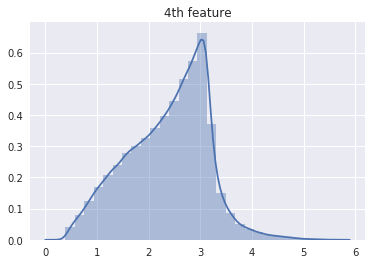

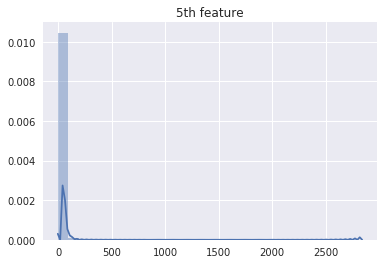

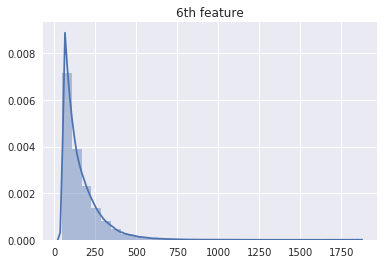

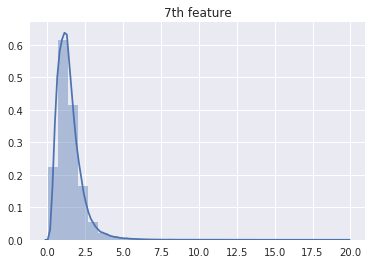

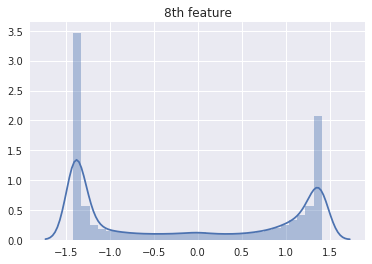

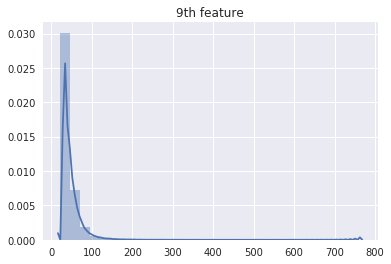

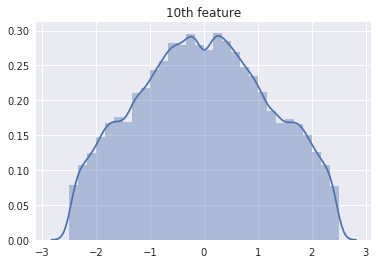

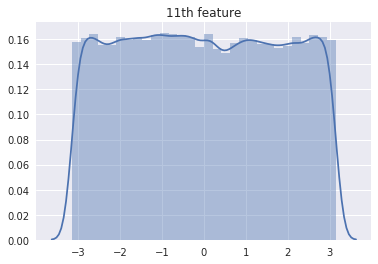

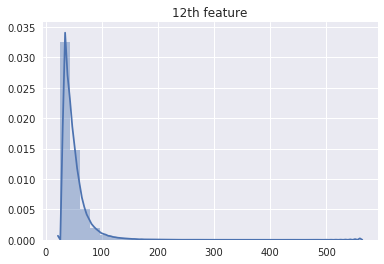

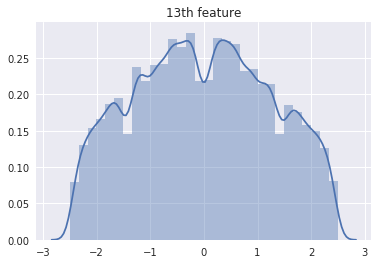

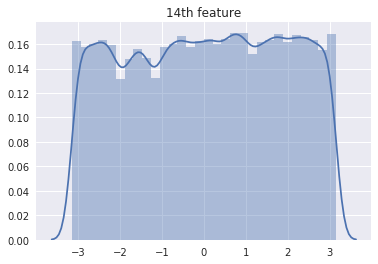

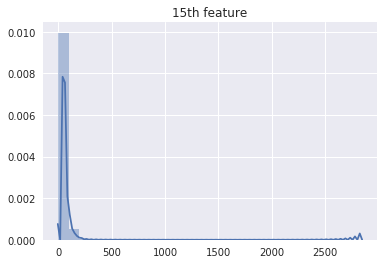

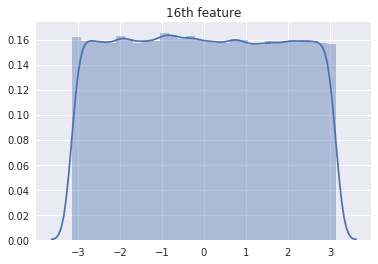

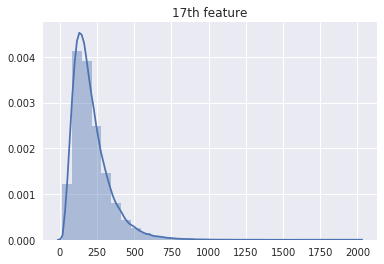

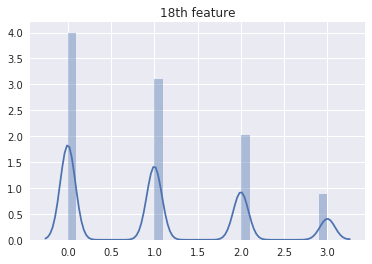

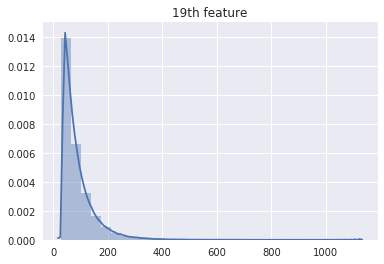

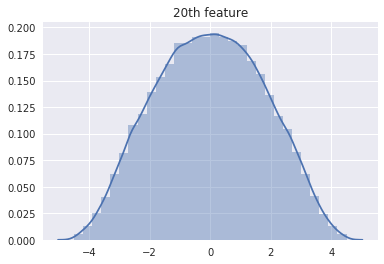

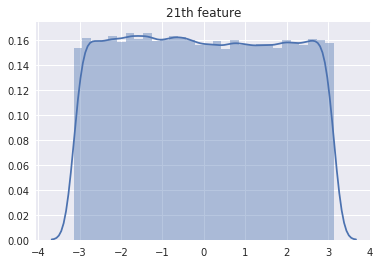

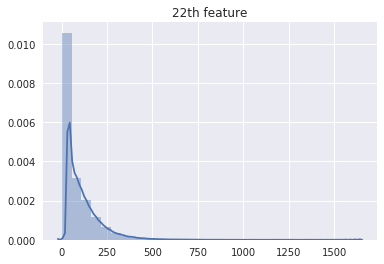

In [60]:
for i in which:
    feature = x[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

### Single feature-response plots

Scatter plot for 0th feature :


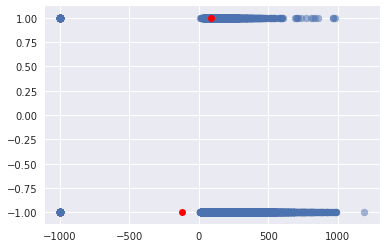

Scatter plot for 1th feature :


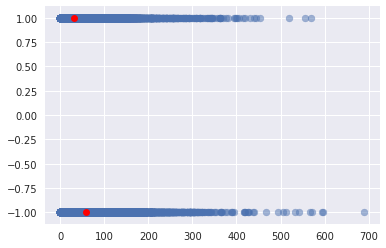

Scatter plot for 2th feature :


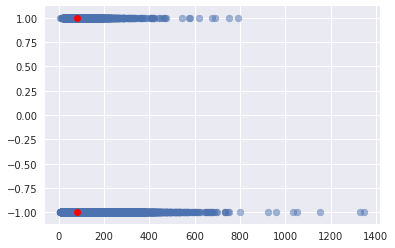

Scatter plot for 3th feature :


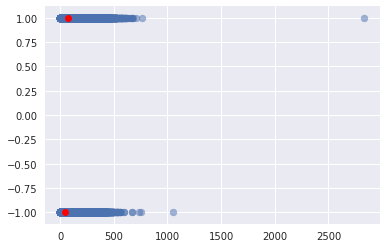

Scatter plot for 4th feature :


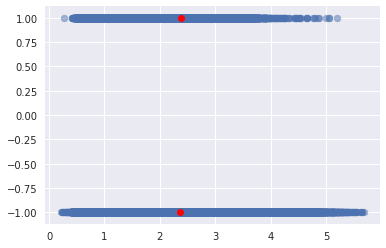

Scatter plot for 5th feature :


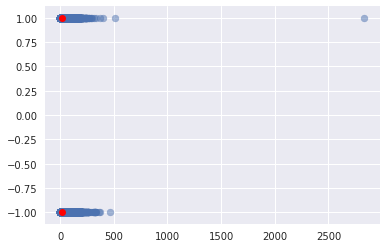

Scatter plot for 6th feature :


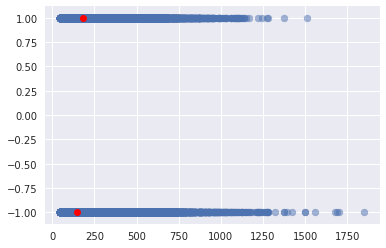

Scatter plot for 7th feature :


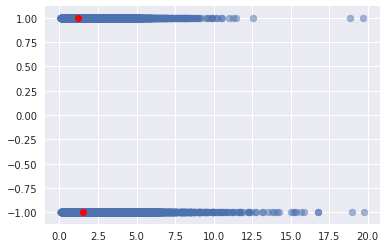

Scatter plot for 8th feature :


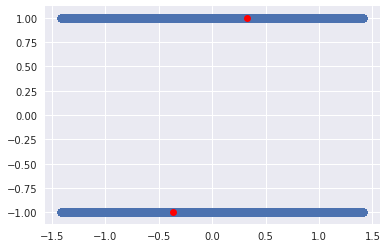

Scatter plot for 9th feature :


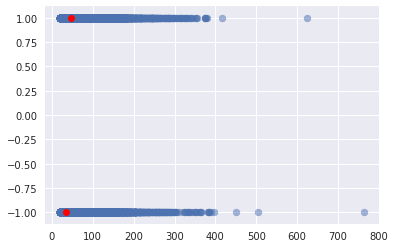

Scatter plot for 10th feature :


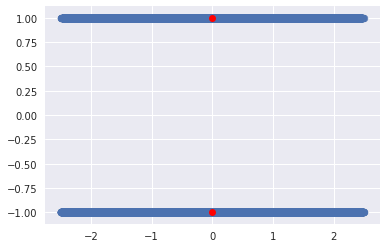

Scatter plot for 11th feature :


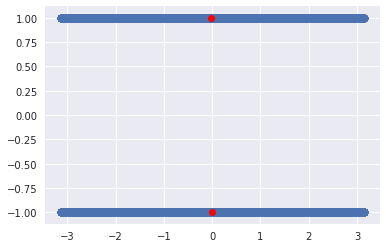

Scatter plot for 12th feature :


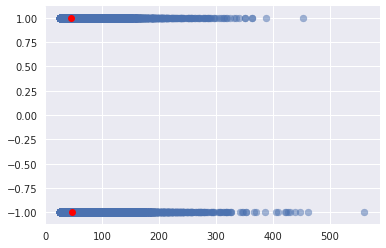

Scatter plot for 13th feature :


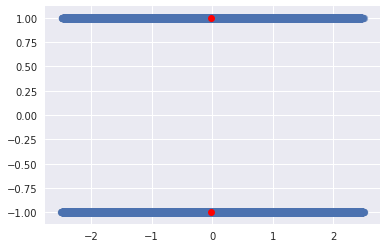

Scatter plot for 14th feature :


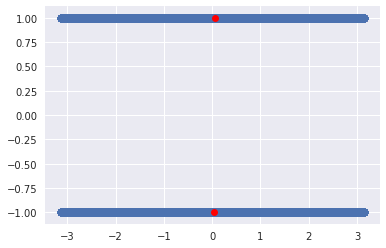

Scatter plot for 15th feature :


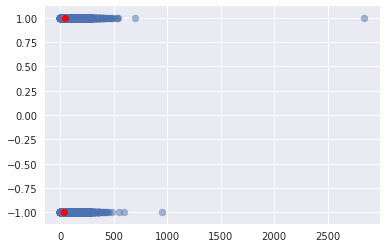

Scatter plot for 16th feature :


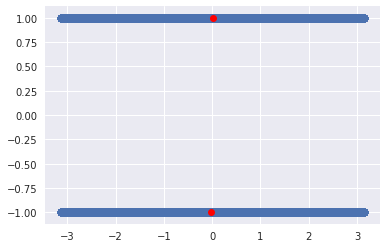

Scatter plot for 17th feature :


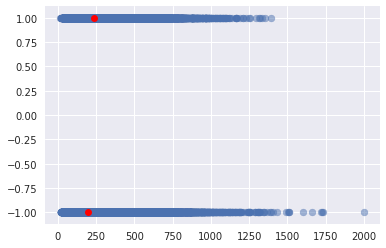

Scatter plot for 18th feature :


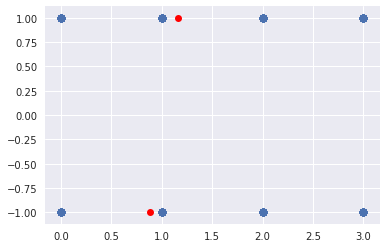

Scatter plot for 19th feature :


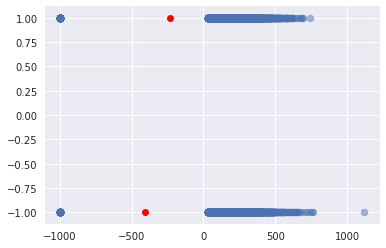

Scatter plot for 20th feature :


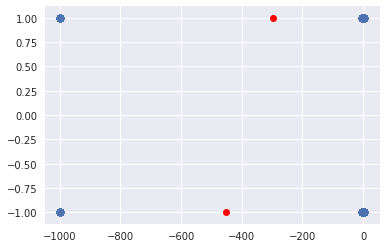

Scatter plot for 21th feature :


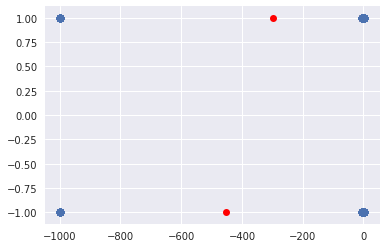

In [52]:
for i in which:
    print("Scatter plot for {i}th feature :".format(i=i))

    t = x[:,i]
    plt.scatter(t,y, alpha = 0.5)
    mean_x1 = np.mean(t[y == 1])
    mean_x0 = np.mean(t[y == -1])
    plt.plot(mean_x0,-1,"or")
    plt.plot(mean_x1,1,"or")
    plt.show()

### Feature boxplots
Visually check influence on response

Boxplot for 0th feature :


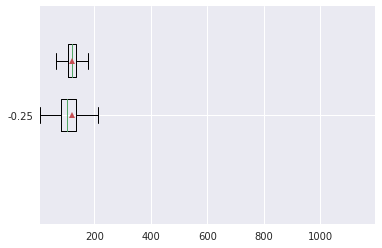

Boxplot for 1th feature :


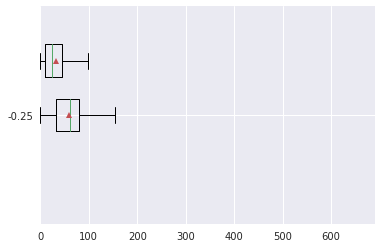

Boxplot for 2th feature :


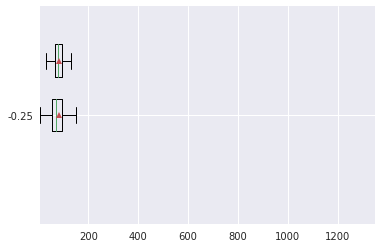

Boxplot for 3th feature :


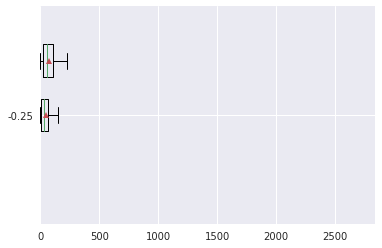

Boxplot for 4th feature :


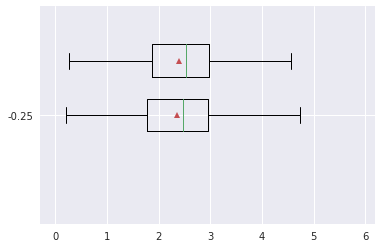

Boxplot for 5th feature :


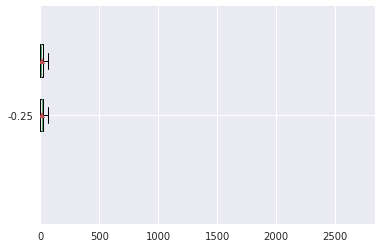

Boxplot for 6th feature :


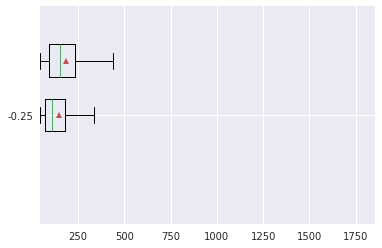

Boxplot for 7th feature :


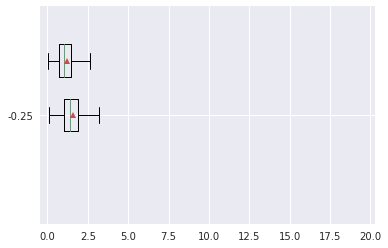

Boxplot for 8th feature :


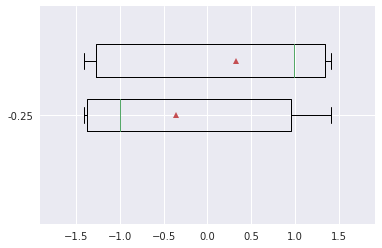

Boxplot for 9th feature :


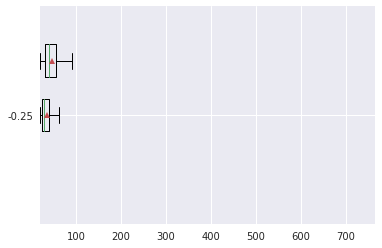

Boxplot for 10th feature :


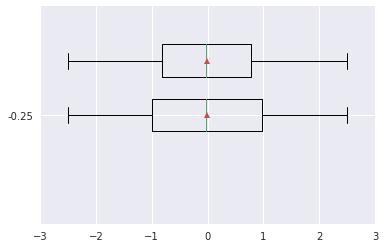

Boxplot for 11th feature :


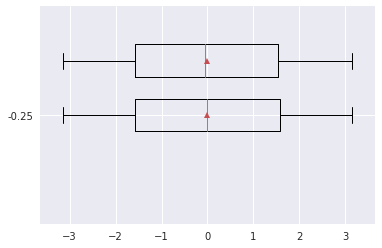

Boxplot for 12th feature :


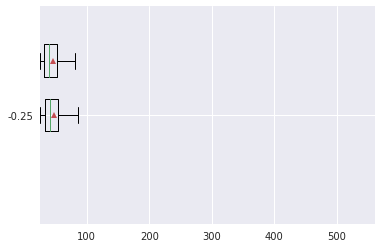

Boxplot for 13th feature :


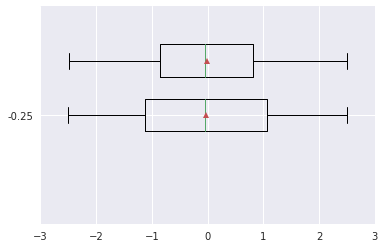

Boxplot for 14th feature :


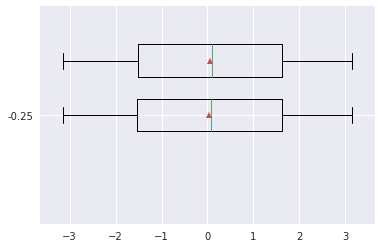

Boxplot for 15th feature :


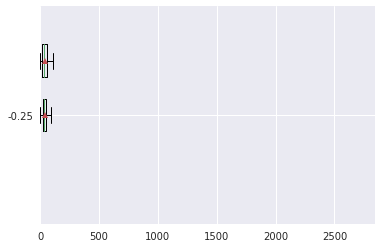

Boxplot for 16th feature :


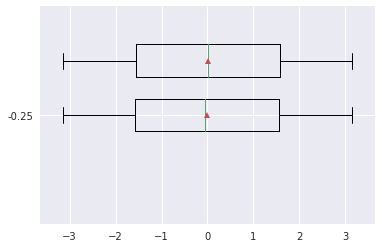

Boxplot for 17th feature :


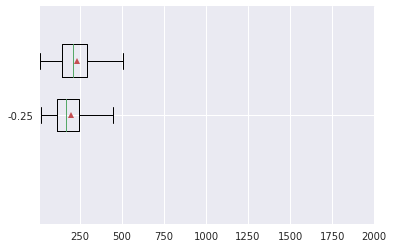

Boxplot for 18th feature :


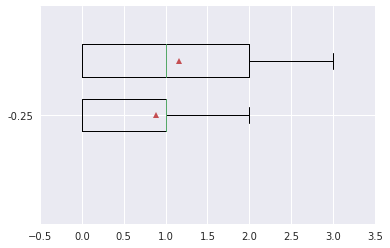

Boxplot for 19th feature :


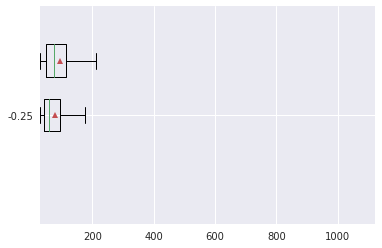

Boxplot for 20th feature :


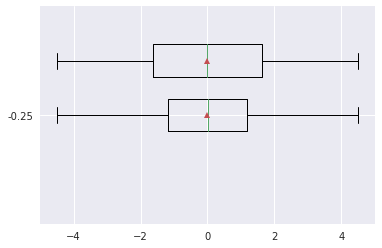

Boxplot for 21th feature :


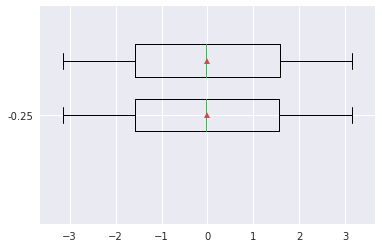

In [53]:
for i in which:
    feature = x[:,i]
    print("Boxplot for {i}th feature :".format(i=i))
    plt.xlim(left = np.min(feature[feature>-999])-0.5)
    plt.xlim(right = np.max(feature[feature>-999])+.5)
    #the mean is dispayed as a triangle
    yes_feat = feature[y==1]
    no_feat = feature[y==-1]
    plt.boxplot(yes_feat[yes_feat>-999],vert = False, positions=[0],showmeans=True)
    plt.boxplot(no_feat[no_feat>-999], vert = False, positions=[-.25], showmeans=True)
    plt.show()
    


### Features with "too many" -999

Checked to eventually remove them.

In [55]:
for i in range(x.shape[1]):
    percentage = len(np.where(x[:,i] < -500)[0])/len(x[:,i])*100
    print("feature {i}: {percentage} of Na".format(i = i, percentage = percentage))

feature 0: 15.245600000000001 of Na
feature 1: 0.0 of Na
feature 2: 0.0 of Na
feature 3: 0.0 of Na
feature 4: 0.0 of Na
feature 5: 0.0 of Na
feature 6: 0.0 of Na
feature 7: 0.0 of Na
feature 8: 0.0 of Na
feature 9: 0.0 of Na
feature 10: 0.0 of Na
feature 11: 0.0 of Na
feature 12: 0.0 of Na
feature 13: 0.0 of Na
feature 14: 0.0 of Na
feature 15: 0.0 of Na
feature 16: 0.0 of Na
feature 17: 0.0 of Na
feature 18: 0.0 of Na
feature 19: 39.9652 of Na
feature 20: 39.9652 of Na
feature 21: 39.9652 of Na
feature 22: 0.0 of Na


## tests for correlation

In [63]:
from Regressions import least_squares

In [72]:
y = x[19]
tx = np.c_[np.ones(len(x[19])),x[6],x[17],x[22]]

In [74]:
least_squares(y,tx)

NameError: name 'compute_mse' is not defined